In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pycountry
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Research Questions**

1. Which renewable energy sources have seen the highest change in returns since 1990? 
2. Which nations are generating the most energy from renewable sources? 
3. Which nations are consuming the most energy? 
4. Which nations have experienced the highest growth in energy demand, and which have had decreases in demand?
5. How much of the global energy demand is currently supplied by renewable sources? 


**Analysis Structure**

This report will begin by analyzing the energy generated from renewable sources, and the countries leading the way in the renewable sector. Next, it will look into the national, and continent/group consumption statistics to provide context and illustrate the increases required in order for renewables to overcome non-renewables as the main source of energy. Lastly, it will outline the current demand in comparison to the supply of renewable energy available. 



**Top 20 Countries Generating Renewable Energy**

In [2]:
df_top_20 = pd.read_csv('../input/renewable-power-generation/top20CountriesPowerGeneration.csv')
df_top_20.head(20)

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
0,China,1189.84,295.0200,79.43,0.1250,1819.9400
1,USA,315.62,277.9100,58.95,18.9600,758.6190
2,Brazil,370.90,42.3700,52.25,0.0000,466.3500
3,Canada,383.48,29.6500,7.12,0.0000,424.0900
4,India,141.80,51.0600,43.76,0.0000,262.6500
5,Germany,24.17,111.5900,45.10,0.1600,227.1800
6,Russia,187.13,0.1400,0.08,0.4300,188.3300
7,Japan,90.67,7.6300,19.01,2.4400,187.3490
8,France,70.13,28.5000,5.87,0.1300,114.8200
9,Italy,50.92,17.4900,16.85,6.0800,113.9900


Text(0.5, 1.02, 'Top 20 Countries Generating Renewable Energy (TWh)')

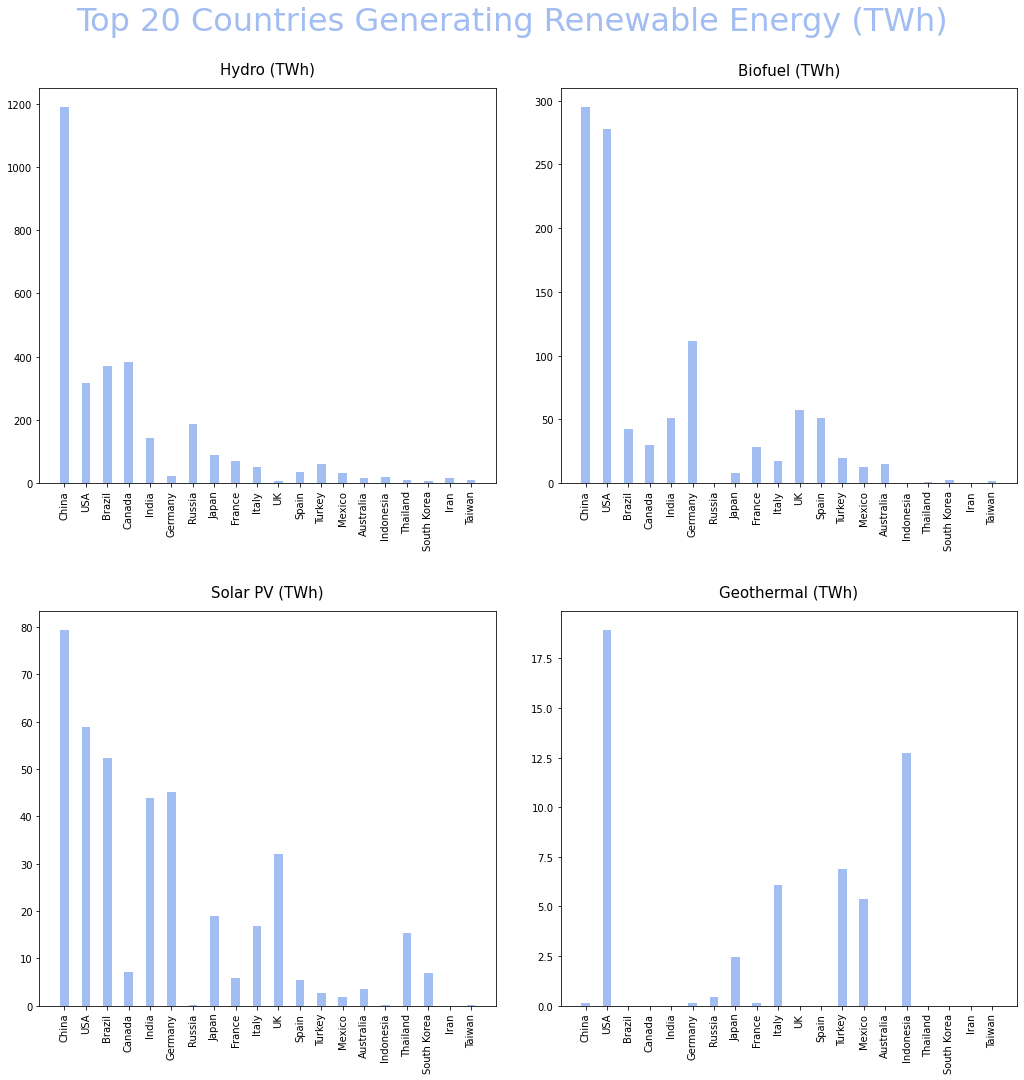

In [3]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8


X1 = df_top_20.iloc[:,0]
y1 = df_top_20.iloc[:,1]

X2 = df_top_20.iloc[:,0]
y2 = df_top_20.iloc[:,2]

X3 = df_top_20.iloc[:,0]
y3 = df_top_20.iloc[:,3]

X4 = df_top_20.iloc[:,0]
y4 = df_top_20.iloc[:,4]


ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)

ax[0,0].bar(X1,y1,width=.4, color=['#A2BDF2'])
ax[0,1].bar(X2,y2,width=.4,color=['#A2BDF2'])
ax[1,0].bar(X3,y3,width=.4,color=['#A2BDF2'])
ax[1,1].bar(X4,y4,width=.4,color=['#A2BDF2'])

ax[0,0].set_title('Hydro (TWh)',fontsize=15, y=1.02)
ax[0,1].set_title('Biofuel (TWh)',fontsize=15, y=1.02)
ax[1,0].set_title('Solar PV (TWh)',fontsize=15, y=1.02)
ax[1,1].set_title('Geothermal (TWh)',fontsize=15, y=1.02)

fig.tight_layout(pad=3.5)
fig.suptitle('Top 20 Countries Generating Renewable Energy (TWh)', fontsize=32, y=1.02, color='#A2BDF2')

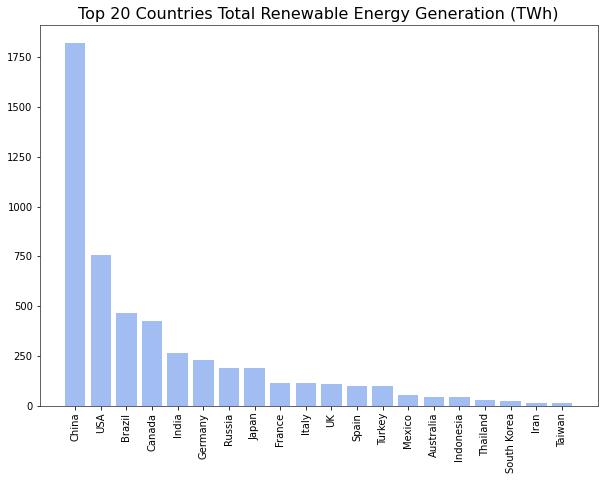

In [4]:
fig, ax = plt.subplots(1, figsize=(10,7))

X_total=df_top_20['Country']
y_total=df_top_20['Total (TWh)']
plt.bar(X_total, y_total, color='#A2BDF2')
plt.title('Top 20 Countries Total Renewable Energy Generation (TWh)', size=16)
ax.tick_params(axis='x', rotation=90)



In [5]:
df_total_renew = pd.read_csv('../input/renewable-power-generation/renewablesTotalPowerGeneration.csv')
df_total_renew=df_total_renew.drop([8])
df_total_renew.head(10)

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04
5,Renewable waste,74.05
6,Solar Thermal,36.02
7,Tidal,19448.16


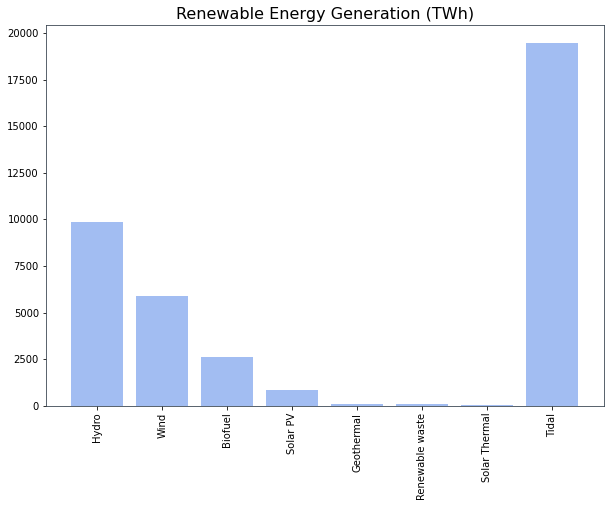

In [6]:
fig, ax = plt.subplots(1, figsize=(10,7))

X_total=df_total_renew['Mode of Generation']
y_total=df_total_renew['Contribution (TWh)']
plt.bar(X_total, y_total, color='#A2BDF2')
plt.title('Renewable Energy Generation (TWh)', size=16)
ax.tick_params(axis='x', rotation=90)

**Non Renewable Energy Generation**

In [7]:
df_total_nonrenew = pd.read_csv('../input/renewable-power-generation/nonRenewablesTotalPowerGeneration.csv')
df_total_nonrenew= df_total_nonrenew.drop([7])
df_total_nonrenew.head(10)

,Mode of Generation,Contribution (TWh)
0,Coal,9863.33
1,Natural Gas,5882.82
2,Nuclear,2636.03
3,Oil,841.87
4,Waste,114.04
5,Municipal Wastes,74.05
6,Others,36.02


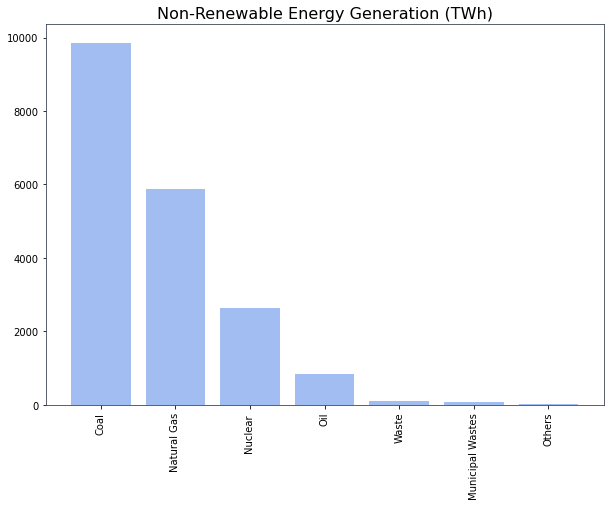

In [8]:
fig, ax = plt.subplots(1, figsize=(10,7))

X_nontotal=df_total_nonrenew['Mode of Generation']
y_nontotal=df_total_nonrenew['Contribution (TWh)']
plt.bar(X_nontotal, y_nontotal, color='#A2BDF2')
plt.title('Non-Renewable Energy Generation (TWh)', size=16)
ax.tick_params(axis='x', rotation=90)

In [9]:
df_total_nonrenew['Contribution (TWh)'].sum()

19448.16

**Changes in Renewable Energy Generation by Source (1990 - 2017)**

In [10]:
df_total_power = pd.read_csv('../input/renewable-power-generation/renewablePowerGeneration97-17.csv')
print(df_total_power)

    Year  Hydro(TWh)  Biofuel(TWh)  Solar PV (TWh)  Geothermal (TWh)
0   1990     2191.67          3.88            0.09             36.42
1   1991     2268.63          4.19            0.10             37.39
2   1992     2267.16          4.63            0.12             39.30
3   1993     2397.67          5.61            0.15             40.23
4   1994     2419.73          7.31            0.17             41.05
5   1995     2545.96          7.95            0.19             39.89
6   1996     2583.18          9.45            0.22             42.18
7   1997     2614.54         12.08            0.27             42.38
8   1998     2628.63         16.07            0.35             45.35
9   1999     2636.26         21.52            0.61             48.66
10  2000     2695.85         31.34            0.99             51.98
11  2001     2638.20         38.45            1.32             51.57
12  2002     2711.12         52.85            1.58             52.29
13  2003     2726.33         64.23

Text(0.5, 1.02, 'Energy Generated by Renewable Sources (TWh)')

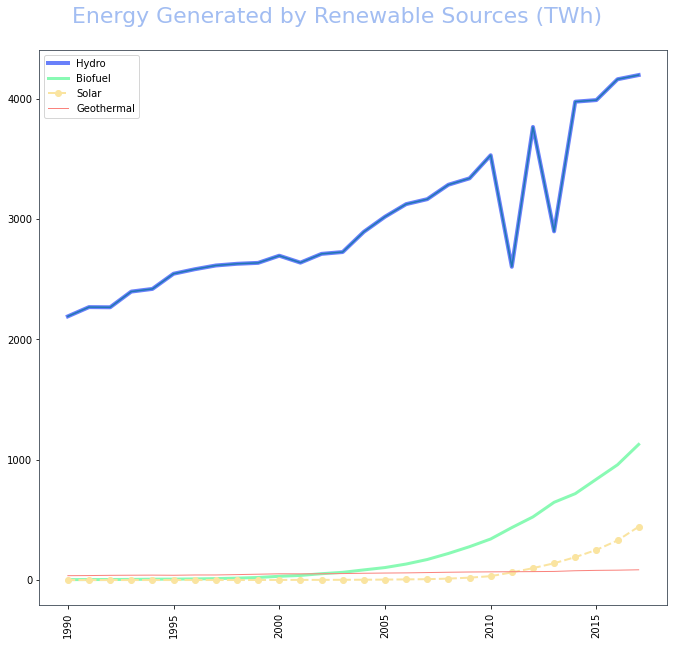

In [11]:
fig, ax = plt.subplots(figsize=(10,9)) 

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8


X5 = df_total_power.iloc[:,0]

y5 = df_total_power.iloc[:,1]
y6 = df_total_power.iloc[:,2]
y7 = df_total_power.iloc[:,3]
y8 = df_total_power.iloc[:,4]


ax.tick_params(axis='x', rotation=90)

plt.plot( X5, y5, marker='', markerfacecolor='blue', markersize=12, color='#6980FA', linewidth=4, label="Hydro")
plt.plot( X5, y6, marker='', color='#89FAB4', linewidth=3, label="Biofuel")
plt.plot( X5, y7, marker='o', color='#FAE4A0', linewidth=2, linestyle='dashed', label="Solar")
plt.plot( X5, y8, marker='', color='#FA837D', linewidth=1, label="Geothermal")

plt.plot(X5, y5)
plt.legend()
fig.tight_layout(pad=3)
fig.suptitle('Energy Generated by Renewable Sources (TWh)', fontsize=22, y=1.02, color='#A2BDF2')

**Renewable Power Generation Percentage Change**

In [12]:
hydro_change = [2191.67, 4149]
hydro_change = pd.Series(hydro_change)
Hydro = (hydro_change.pct_change()*100)

solar_change = [.09, 443.55]
solar_change = pd.Series(solar_change)
Solar = (solar_change.pct_change()*100)  

biofuel_change = [3.88, 1127.31]
biofuel_change = pd.Series(biofuel_change)
Biofuel = (biofuel_change.pct_change()*100)

print(Hydro, Biofuel, Solar)

0          NaN
1    89.307697
dtype: float64 0             NaN
1    28954.381443
dtype: float64 0              NaN
1    492733.333333
dtype: float64


In [13]:
Solar_post_2010 =[32.22, 63.76, 99.03, 139.64,190.25, 250.75, 329.14, 443.55]
Solar_post_2010 = pd.Series(Solar_post_2010)
Solar_post_2010.pct_change()*100

0          NaN
1    97.889510
2    55.316813
3    41.007775
4    36.243197
5    31.800263
6    31.262213
7    34.760284
dtype: float64

While the amount of hydro power produced globally increased 89.3% over the last 27 years, and that from Biofuel 28,954.38%, solar energy has led way, increasing an astounding 49,2733.33%. Even after the initial higher increases post-PV 2010, we maintained roughly a 32% increase per year from 2013-2017. 

In addition to the development of Photovoltaic (PV) solar panels in 2010, novel nature-inspired optimization algorithms for renewable energy generation, distribution and management, policy is also playing a key role. More specifically, policies like those in California which demands homes built after 2020 have solar roofing, German solar panel rebates and other financial incentives, and Australia's blockchain powered micro-grids that utilize AI to buy and sell excess energy, are all pushing the sector further. 

However, storage is still a major hurdle, preventing renewables, specifically, solar and wind from capturing 40% of the worlds energy market, as projected for 2040. Accordingly, to overcome the issues regarding the overuse of precious metals required for batteries, bio-technologists are exploring possibilities to substitute conventional lithium-ion batteries with synthetic polypeptides -- which make up proteins -- and other polymers. Combine this, with Polychromatic solar energy conversion, and the future of solar energy starts to look even brighter. 

This being said, what this dataset left out, is time series data for Global Wind Production (TWh), which would be interesting to compare with the improvements of solar. 

**Global Energy Consumption**

In [14]:
df_country_cons = pd.read_csv('../input/consumption/Country_Consumption_TWH.csv')
df_cont_cons = pd.read_csv('../input/consumption/Continent_Consumption_TWH.csv')

In [15]:
df_cont_cons.head(10)

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74
5,1995,107112.30,56754.40,26946.71,20713.03,26714.11,6024.34,29761.17,1290.93,5000.90,3744.86,11188.06
6,1996,109763.94,58417.49,27481.69,21445.72,27295.61,6303.46,30772.98,1372.34,5152.09,3814.64,10850.79
7,1997,110903.68,59022.25,27446.80,21341.05,27574.73,6570.95,31435.89,1407.23,5280.02,4058.87,10373.96
8,1998,111450.29,59219.96,27528.21,21503.87,27772.44,6803.55,31331.22,1442.12,5431.21,4082.13,10152.99
9,1999,113974.00,60301.55,28319.05,21306.16,28528.39,6989.63,32412.81,1477.01,5559.14,4244.95,10373.96


Text(0.5, 1.02, 'Continent/Group Power Consumption (TWh)')

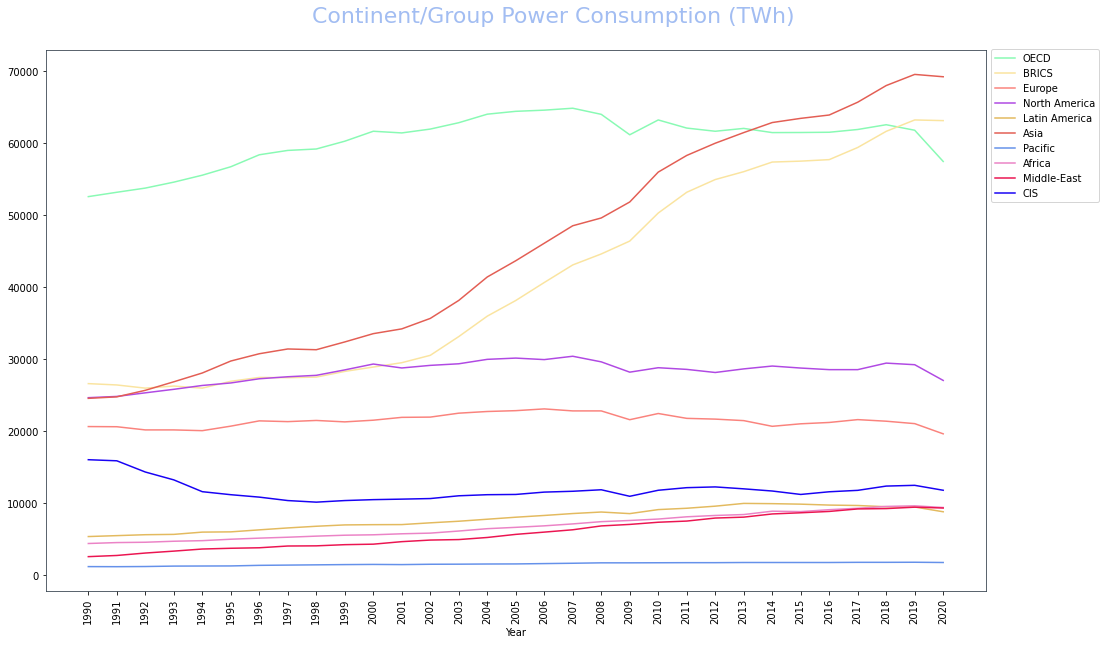

In [16]:
colors = ['#89FAB4', '#FAE4A0', '#FA837D', '#B049E3', '#E3BA5F', '#E35E54', '#6591EA', '#EB83C6', '#EB1551', '#1802F4']
ax = df_cont_cons.plot(x='Year', y=df_cont_cons.columns[2:], color=colors, figsize=(16, 9))  # plot the dataframe and set Time as x
fig = ax.get_figure()  # extract the figure object
ax.set_xticks(df_cont_cons.Year)  # set the xticks
ax.tick_params(axis='x', rotation=90)
ax.legend(bbox_to_anchor=(1, 1.01), loc='upper left') # move the legend
fig.tight_layout(pad=3)
fig.suptitle('Continent/Group Power Consumption (TWh)', fontsize=22, y=1.02, color='#A2BDF2')

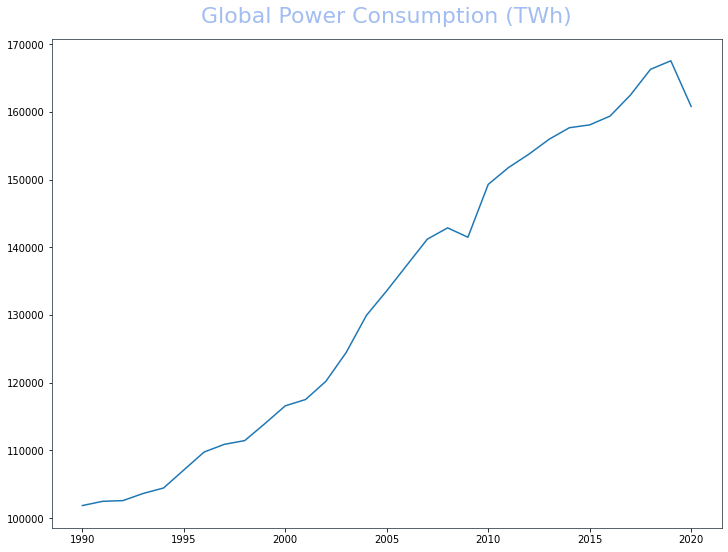

In [17]:
fig, ax = plt.subplots(figsize=(12, 9)) 

X1 = df_cont_cons.iloc[:,0]
y1 = df_cont_cons.iloc[:,1]
plt.title('Global Power Consumption (TWh)', fontsize=22, y=1.02, color='#A2BDF2')
plt.plot(X1,y1)

In [18]:
df_cont_cons.head(10)

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74
5,1995,107112.30,56754.40,26946.71,20713.03,26714.11,6024.34,29761.17,1290.93,5000.90,3744.86,11188.06
6,1996,109763.94,58417.49,27481.69,21445.72,27295.61,6303.46,30772.98,1372.34,5152.09,3814.64,10850.79
7,1997,110903.68,59022.25,27446.80,21341.05,27574.73,6570.95,31435.89,1407.23,5280.02,4058.87,10373.96
8,1998,111450.29,59219.96,27528.21,21503.87,27772.44,6803.55,31331.22,1442.12,5431.21,4082.13,10152.99
9,1999,113974.00,60301.55,28319.05,21306.16,28528.39,6989.63,32412.81,1477.01,5559.14,4244.95,10373.96


In [19]:
df_country_cons.head(10)

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
0,1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1,1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
2,1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
3,1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
4,1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0
5,1995.0,1045.0,2063.0,162.0,53.0,42.0,240.0,336.0,159.0,73.0,...,93.0,15.0,24.0,36.0,73.0,104.0,101.0,15.0,85.0,28.0
6,1996.0,1074.0,2108.0,170.0,56.0,43.0,251.0,348.0,159.0,77.0,...,99.0,16.0,23.0,38.0,76.0,107.0,98.0,14.0,90.0,29.0
7,1997.0,1073.0,2130.0,179.0,56.0,43.0,244.0,345.0,162.0,75.0,...,101.0,16.0,24.0,40.0,79.0,109.0,109.0,15.0,86.0,31.0
8,1998.0,1079.0,2148.0,183.0,57.0,42.0,252.0,343.0,166.0,75.0,...,104.0,16.0,25.0,42.0,80.0,111.0,111.0,17.0,92.0,32.0
9,1999.0,1099.0,2206.0,187.0,57.0,39.0,252.0,335.0,169.0,74.0,...,106.0,17.0,27.0,43.0,83.0,109.0,126.0,18.0,94.0,32.0


In [20]:
df_mean = df_country_cons.mean()
df_med=df_mean.mean()
print(df_med)

265.5032258064516


Although the mean of the means of all rows is 265, I lowered the threshold of those to graph below to 220 to be able to include the top 9, since the outlier position of China and the US pull the average up. 

In [21]:
df_med = df_country_cons.loc[:,df_country_cons.mean(axis=0) > 210]
df_med.head(20)

,Year,China,United States,Brazil,France,Germany,Russia,Canada,Japan,South Korea,India
0,1990.0,874.0,1910.0,141.0,225.0,351.0,879.0,211.0,440.0,94.0,306.0
1,1991.0,848.0,1925.0,143.0,237.0,344.0,871.0,210.0,445.0,101.0,318.0
2,1992.0,877.0,1964.0,145.0,234.0,338.0,795.0,216.0,455.0,111.0,330.0
3,1993.0,929.0,1998.0,148.0,238.0,335.0,751.0,223.0,458.0,125.0,338.0
4,1994.0,973.0,2036.0,156.0,231.0,333.0,657.0,231.0,483.0,133.0,351.0
5,1995.0,1045.0,2063.0,162.0,240.0,336.0,636.0,234.0,495.0,146.0,371.0
6,1996.0,1074.0,2108.0,170.0,251.0,348.0,630.0,239.0,506.0,158.0,383.0
7,1997.0,1073.0,2130.0,179.0,244.0,345.0,602.0,242.0,511.0,172.0,398.0
8,1998.0,1079.0,2148.0,183.0,252.0,343.0,588.0,240.0,502.0,158.0,407.0
9,1999.0,1099.0,2206.0,187.0,252.0,335.0,609.0,247.0,510.0,174.0,431.0


Text(0.5, 1.02, 'Top 10 Countries with the Highest Average Power Consumption (TWh)')

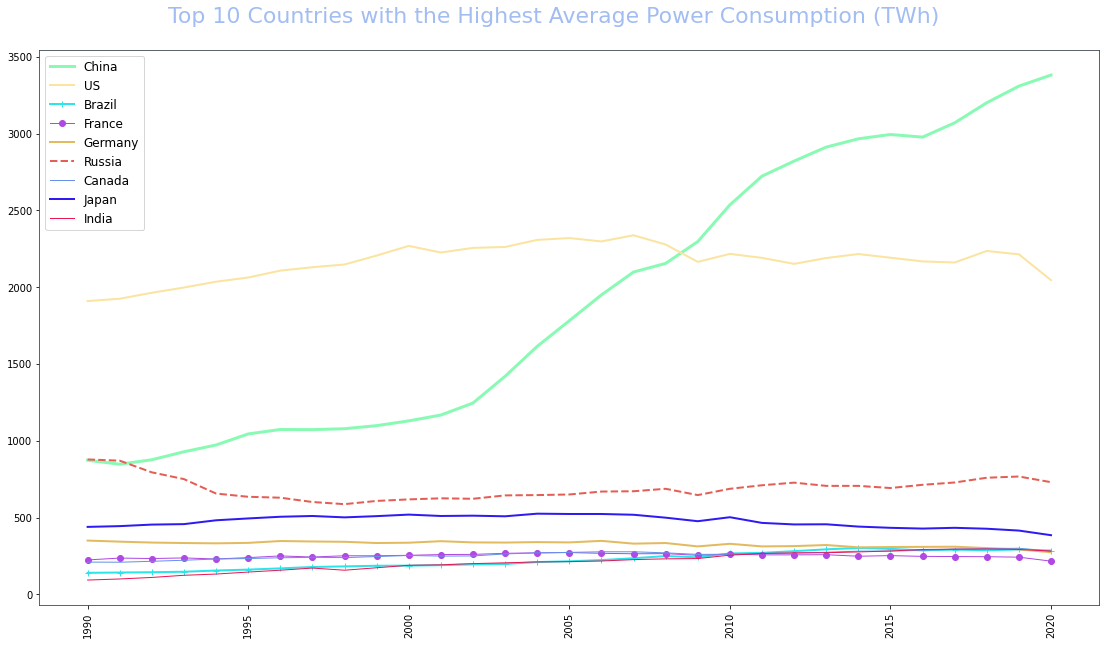

In [22]:
fig, ax = plt.subplots(figsize=(16,9)) 

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8

X1 = df_med.iloc[:,0]

y1 = df_med.iloc[:,1]
y2 = df_med.iloc[:,2]
y3 = df_med.iloc[:,3]
y4 = df_med.iloc[:,4]
y5 = df_med.iloc[:,5]
y6 = df_med.iloc[:,6]
y7 = df_med.iloc[:,7]
y8 = df_med.iloc[:,8]
y9 = df_med.iloc[:,9]

ax.tick_params(axis='x', rotation=90)

plt.plot( X1, y1, marker='', color='#89FAB4', linewidth=3, label = 'China')
plt.plot( X1, y2, marker='', color='#FAE4A0', linewidth=2, label= 'US')
plt.plot( X1, y3, marker='+', color='#2BE5EB', linewidth=2, label="Brazil")
plt.plot( X1, y4, marker='o', color='#B049E3', linewidth=1, label="France")
plt.plot( X1, y5, marker='', color='#E3BA5F', linewidth=2, label="Germany")
plt.plot( X1, y6, marker='', color='#E35E54', linewidth=2, linestyle='dashed' , label="Russia") 
plt.plot( X1, y7, marker='', color='#6591EA', linewidth=1, label="Canada")
plt.plot( X1, y8, marker='', color='#2E1BF4', linewidth=2, label="Japan")
plt.plot( X1, y9, marker='', color='#EB1551', linewidth=1, label="India")

plt.legend(fontsize=12)
fig.tight_layout(pad=3)
fig.suptitle('Top 10 Countries with the Highest Average Power Consumption (TWh)', fontsize=22, y=1.02, color='#A2BDF2')

China's development progress, and its ability to lift millions out of poverty in the last 20 years, is also reflected in their increased energy consumption, as shown above. Accordingly, the BRICS and Asia figures show similar trends and one can expect Africa to be next in line. 

In turn, this sheds some light on the intense ramifications that will occur as the large populations of many developing nations such as India, Thailand, and Brazil are lifted from poverty and begin consuming like those in the North, especially the US, which has. and to a large content, continues to, promote a 'dream' and lifestyle of conpicious consumtion and material wealth. The question remains as to how such social mobility can be achieved in a sustainable manner and that incorporates value not only based on the destruction of ecological resources, and what this says to the many populations who have been chasing, and promised such. 

Although, 2020, was the first year in many, that global energy consumption declined for many developed/OECD nations, as viewed in the continent/group figure above, it is difficult to surmise exactly how much of this is a result of increased renewable useage, or social and value changes that have shifted from materialism to experience and access based forms of value. It is interesting to note that Japan has maintened a negative consumption growth rate the last 4 years, with minimal increases over the last 15, and in relative numbers, is roughly half that of the US. To get a better picture of the intensity of US power consumption, lets do a few comparisons in terms of per/capita - see below. 



In [23]:
US_pop = 365000000
US_KWh = 2265000000000
US_capita =US_KWh/US_pop

Brazil_pop = 262000000 
Brazil_KWh = 242000000000
Brazil_capita = Brazil_KWh/Brazil_pop

US_Brazil_pop_diff = ((US_pop-Brazil_pop) / ((US_pop+Brazil_pop)/2))*100

Japan_pop = 125000000
Japan_KWh= 477000000000
Japan_capita = Japan_KWh/Japan_pop


print(str(US_capita) + "is the per capita Kilo Watt hour consumption for the US while that of Brazil is "
      + str(Brazil_capita) + " This is over a 571% increase, a troubling figure when considering that Brazils population, only " + str(US_Brazil_pop_diff) +"% less than the US, is beginning to consume like Americans. Japan on the other hand has retained a consumption level half the per/capita of that of the US with " + str(Japan_capita))


6205.479452054795is the per capita Kilo Watt hour consumption for the US while that of Brazil is 923.6641221374045 This is over a 571% increase, a troubling figure when considering that Brazils population, only 32.854864433811805% less than the US, is beginning to consume like Americans. Japan on the other hand has retained a consumption level half the per/capita of that of the US with 3816.0


In [24]:
df_country_cons = df_country_cons.set_index(df_country_cons['Year'])
df_country_cons = df_country_cons.dropna()
df_country_cons = df_country_cons.drop(columns=['Year'])
df_country_cons.head(40)


,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,Poland,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
Year,,,,,,,,,,,,,,,,,,,,,
1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,103.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,101.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,99.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,101.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,96.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0
1995.0,1045.0,2063.0,162.0,53.0,42.0,240.0,336.0,159.0,73.0,99.0,...,93.0,15.0,24.0,36.0,73.0,104.0,101.0,15.0,85.0,28.0
1996.0,1074.0,2108.0,170.0,56.0,43.0,251.0,348.0,159.0,77.0,104.0,...,99.0,16.0,23.0,38.0,76.0,107.0,98.0,14.0,90.0,29.0
1997.0,1073.0,2130.0,179.0,56.0,43.0,244.0,345.0,162.0,75.0,102.0,...,101.0,16.0,24.0,40.0,79.0,109.0,109.0,15.0,86.0,31.0
1998.0,1079.0,2148.0,183.0,57.0,42.0,252.0,343.0,166.0,75.0,95.0,...,104.0,16.0,25.0,42.0,80.0,111.0,111.0,17.0,92.0,32.0


Percent Change -- Calculating the highest and lowest percent change in power consumption from 1990-2020

In [25]:
df_pct = df_country_cons.append(df_country_cons.iloc[[0, -1]].pct_change().iloc[-1].mul(100).rename('percChng'))
df_pct = df_pct.reset_index()
percChange = df_pct.loc[[31]]
percChange.head(20)



,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
31,percChng,286.842105,7.120419,102.836879,6.25,-22.0,-3.555556,-21.652422,-6.802721,4.477612,...,46.511628,50.0,168.181818,178.787879,140.909091,37.777778,288.405797,322.222222,260.344828,305.0


In [26]:
df_pct_change = percChange.iloc[-1].reset_index()
df_pct_change= df_pct_change.drop(0)
df_pct_change = df_pct_change.rename(columns= {'index': 'Country', 31:'percChange'})

convert_dict = {'Country': str,
                'percChange': float
               }
  
df_pct_change = df_pct_change.astype(convert_dict)
df_change_top = df_pct_change.nlargest(20, 'percChange').reset_index()
df_change_top.head(20)

,index,Country,percChange
0,42,Kuwait,322.222222
1,30,Malaysia,319.047619
2,44,United Arab Emirates,305.000000
3,41,Iran,288.405797
4,1,China,286.842105
5,43,Saudi Arabia,260.344828
6,31,South Korea,201.063830
7,33,Thailand,197.619048
8,34,India,196.732026
9,38,Egypt,178.787879


<BarContainer object of 20 artists>

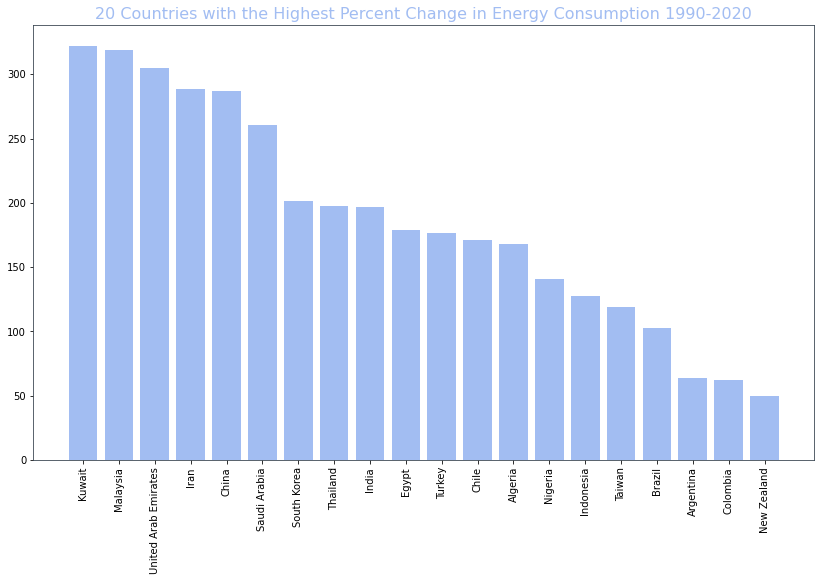

In [27]:
plt.subplots(figsize=(14,8)) 

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8

Xpct = df_change_top.iloc[:,1]
ypct = df_change_top.iloc[:,2]

plt.xticks(rotation=90)
plt.title('20 Countries with the Highest Percent Change in Energy Consumption 1990-2020', fontsize=16, color='#A2BDF2' )
plt.bar(Xpct, ypct, color='#A2BDF2')

In [28]:
df_pct_low = percChange.iloc[-1].reset_index()

df_pct_low = df_pct_change.rename(columns= {'index': 'Country', 31:'percChange'})

convert_dict = {'Country': str,
                'percChange': float
               }
  
df_pct_low = df_pct_low.astype(convert_dict)
df_pct_low = df_pct_low.nsmallest(20, 'percChange').reset_index()
df_pct_low.head(20)

,index,Country,percChange
0,20,Ukraine,-65.873016
1,12,Romania,-48.387097
2,27,Venezuela,-27.500000
3,15,United Kingdom,-25.242718
4,5,Czechia,-22.000000
5,7,Germany,-21.652422
6,19,Russia,-16.837315
7,29,Japan,-12.272727
8,8,Italy,-6.802721
9,21,Uzbekistan,-6.382979


<BarContainer object of 20 artists>

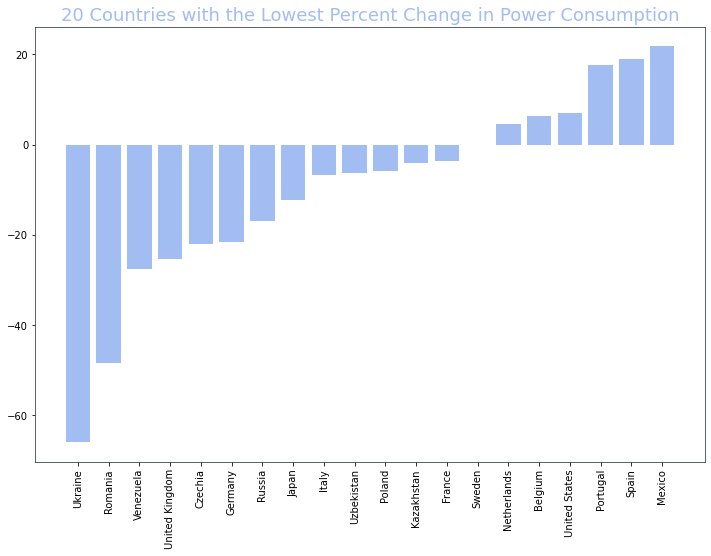

In [29]:
plt.subplots(figsize=(12,8)) 

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8

Xpct = df_pct_low.iloc[:,1]
ypct = df_pct_low.iloc[:,2]

plt.xticks(rotation=90)
plt.title('20 Countries with the Lowest Percent Change in Power Consumption', fontsize=18, color='#A2BDF2' )
plt.bar(Xpct, ypct, color='#A2BDF2')

In [30]:
dfsum =df_total_renew.sum()
print(dfsum)

Mode of Generation    HydroWindBiofuelSolar PVGeothermalRenewable wa...
Contribution (TWh)                                             38896.32
dtype: object


In [31]:

total_renew_vs_consumption = {'Global Stats':['Consumption','Renewable Production'], 'TWh': [160819.64,   38896.32]}

totals = pd.DataFrame(total_renew_vs_consumption)

totals.head(10)

,Global Stats,TWh
0,Consumption,160819.64
1,Renewable Production,38896.32


<BarContainer object of 2 artists>

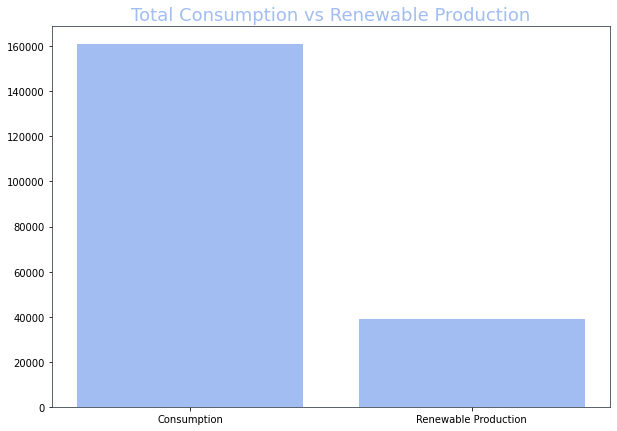

In [32]:
plt.subplots(figsize=(10,7)) 

Xtot = totals.iloc[:,0]
ytot = totals.iloc[:,1]

plt.title('Total Consumption vs Renewable Production', fontsize=18, color='#A2BDF2' )
plt.bar(Xtot, ytot, color='#A2BDF2')


Even though renewable energy generation has indeed been making notable gains throughout the last 30 years due to technological advances and increased adoption, we still have a fair ways to go, especially when considering the massive growth of energy consumption in developing nations, which is likely to continue with increasing intensity. Although innovations will help balance these increases to an extent, much of the change required is from a social perspective and conceptions of materialism, value, 'progress' and 'development'. Thankfully the fallacy of the 'American Dream', and its harm to the environment and to society has been exposed in recent decades, and a new 'Global Dream' is slowly being formed thanks to international policy agreements and broader social movements such as 'Friday's for Future', the SDGs, and the Paris Climate Agreement. 